In [112]:
!pip install pdoc

# **Part 1: Model Development**

In [113]:
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [114]:
# The root directory of the csv files associated for task 1
task_1_dir = 'task1'

### **Section 1. Examine Data From a single csv file**

In [115]:
# Read the first csv file attached for task 1
df = pd.read_csv(os.path.join(task_1_dir, 'features_day1.csv'))

In [116]:
# Examine our data frame
df

,cell_id,cell_x,cell_y,cell_z,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,0,1400.0,1.136868e-13,36.0,0.0,5.628905e+07,5.276937e+07,1.182938e+08,1441.167582,0.211673,...,0.203464,True,1400.000000,7.0,5.628882e+07,5.376503e+06,0.020885,0.214286,5.803571e+07,0.183350
1,1,1400.0,1.136868e-13,36.0,2.0,1.448895e+07,8.940317e+06,4.589672e+03,565.106185,0.251047,...,0.000982,False,1400.000000,9.0,1.448893e+07,2.624299e+03,0.000253,0.142857,8.125000e+07,0.000008
2,2,1400.0,1.136868e-13,36.0,0.0,4.619858e+06,1.917261e+07,3.462102e+06,2045.724566,0.739179,...,0.000000,False,1400.000000,4.0,4.619858e+06,2.142543e+02,0.000044,0.142857,1.142857e+08,0.000146
3,3,1400.0,1.136868e-13,36.0,3.0,7.812103e+07,2.953364e+07,1.607711e+07,1974.726563,0.027794,...,0.000000,True,1400.000000,6.0,7.812001e+07,1.937496e+03,0.189714,0.071429,5.803571e+07,0.028831
4,4,1400.0,1.136868e-13,36.0,0.0,8.155186e+06,8.916038e+07,5.362047e+06,2307.346745,0.476142,...,0.000017,False,1400.000000,9.0,8.155186e+06,3.160310e+03,0.000013,0.125000,8.125000e+07,0.000224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,166,1400.0,2.424871e+03,52.0,0.0,1.915289e+07,3.188155e+07,3.517436e+07,757.080047,0.039838,...,0.000421,False,1809.948452,4.0,1.915288e+07,3.902869e+03,0.000008,0.214286,8.125000e+07,0.000008
167,167,1400.0,2.424871e+03,52.0,0.0,1.628095e+06,1.251337e+07,7.186093e+03,1587.668871,0.398597,...,0.000100,False,1809.948452,11.0,1.628095e+06,3.573406e+02,0.000183,0.250000,1.142857e+08,0.000115
168,168,1400.0,2.424871e+03,52.0,3.0,6.228646e+07,2.652463e+07,9.177562e+07,1675.641612,0.107098,...,0.000010,False,1809.948452,8.0,6.228497e+07,8.699090e+03,0.030200,0.142857,5.803571e+07,0.061585
169,169,1400.0,2.424871e+03,52.0,0.0,2.802718e+07,7.447951e+07,1.072779e+07,1540.546426,0.235855,...,0.000140,False,1809.948452,8.0,2.802712e+07,5.840365e+03,0.000022,0.125000,8.125000e+07,0.000026


In [117]:
# Get the keys of our columns
df.keys()

Index(['cell_id', 'cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19'],
      dtype='object')

In [118]:
# Get the data type assigned to each column
df.dtypes

,0
cell_id,int64
cell_x,float64
cell_y,float64
cell_z,float64
feature_1,float64
feature_2,float64
feature_3,float64
feature_4,float64
feature_5,float64
feature_6,float64


In [119]:
# Get the shape of our csv file
df.shape

(171, 23)

In [120]:
# Check if there is any null values in our records
df.isnull().sum()

,0
cell_id,0
cell_x,0
cell_y,0
cell_z,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0


In [121]:
# Examine the values for the boolean feature (feature_11)
print(df['feature_11'].unique())

[ True False]


In [122]:
# Remove duplicate values
df = df.drop_duplicates()

In [123]:
df

,cell_id,cell_x,cell_y,cell_z,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
0,0,1400.0,1.136868e-13,36.0,0.0,5.628905e+07,5.276937e+07,1.182938e+08,1441.167582,0.211673,...,0.203464,True,1400.000000,7.0,5.628882e+07,5.376503e+06,0.020885,0.214286,5.803571e+07,0.183350
1,1,1400.0,1.136868e-13,36.0,2.0,1.448895e+07,8.940317e+06,4.589672e+03,565.106185,0.251047,...,0.000982,False,1400.000000,9.0,1.448893e+07,2.624299e+03,0.000253,0.142857,8.125000e+07,0.000008
2,2,1400.0,1.136868e-13,36.0,0.0,4.619858e+06,1.917261e+07,3.462102e+06,2045.724566,0.739179,...,0.000000,False,1400.000000,4.0,4.619858e+06,2.142543e+02,0.000044,0.142857,1.142857e+08,0.000146
3,3,1400.0,1.136868e-13,36.0,3.0,7.812103e+07,2.953364e+07,1.607711e+07,1974.726563,0.027794,...,0.000000,True,1400.000000,6.0,7.812001e+07,1.937496e+03,0.189714,0.071429,5.803571e+07,0.028831
4,4,1400.0,1.136868e-13,36.0,0.0,8.155186e+06,8.916038e+07,5.362047e+06,2307.346745,0.476142,...,0.000017,False,1400.000000,9.0,8.155186e+06,3.160310e+03,0.000013,0.125000,8.125000e+07,0.000224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,166,1400.0,2.424871e+03,52.0,0.0,1.915289e+07,3.188155e+07,3.517436e+07,757.080047,0.039838,...,0.000421,False,1809.948452,4.0,1.915288e+07,3.902869e+03,0.000008,0.214286,8.125000e+07,0.000008
167,167,1400.0,2.424871e+03,52.0,0.0,1.628095e+06,1.251337e+07,7.186093e+03,1587.668871,0.398597,...,0.000100,False,1809.948452,11.0,1.628095e+06,3.573406e+02,0.000183,0.250000,1.142857e+08,0.000115
168,168,1400.0,2.424871e+03,52.0,3.0,6.228646e+07,2.652463e+07,9.177562e+07,1675.641612,0.107098,...,0.000010,False,1809.948452,8.0,6.228497e+07,8.699090e+03,0.030200,0.142857,5.803571e+07,0.061585
169,169,1400.0,2.424871e+03,52.0,0.0,2.802718e+07,7.447951e+07,1.072779e+07,1540.546426,0.235855,...,0.000140,False,1809.948452,8.0,2.802712e+07,5.840365e+03,0.000022,0.125000,8.125000e+07,0.000026


### **Section 1.1 EDA on the csv file**

In this Section First a Heatmap which included the correlation between each and every feature in the dataframe was produced. Observing this heatmap it was clear that some features (especially feature_2, feature_14, feature_3, feature_8, feature_5, feature_9) shared a very strong correlation be it positive or negative. This observation indicates that this correlated features may introduce some noise or redundancy in our model development phase, in other normal cases, a feature engineering step would have been introduced like dropping some of the correlated features and observing the effect of that on the performance of our model, but since the requirement of the task stated that the feature_11 & feature_12 should have a relationship with each feature when developing our model, we will keep them.



Following the observations from the correlation heatmap, a scatter plot was plotted for features with high coorelation values in order to observe how they are correlated. Some features can be represented by a straight line & others by a horizontal line (by ignoring the outliers present).

After these observations, the last 2 figures in this section will focus on the effect of the spatial/geographical locations of the cells on the targeted variables (feature_11 & feature_12). First a correlation heatmap was plotted similar to the previous approach but the aim this time was to observe how different cell locations can affect the targeted features. By observing the heatmap it was clear that the X & Y dimensions (cell_x, cell_y) had greater influence/correlation on feature_11 than it had with feature_12, however on the contrary the Z dimension (cell_z) had greater correlation with feature_12 than that of feature_11. Following these observations a 3D scatter plot for each feature was plotted where each cell was represented by a dot, the spatial location of it can be visualized as its location in the 3D grid and the value of its feature by a color map that is presented next to each figure (3D scatter plot). After observing the 3D scatter plot it was clear that indeed cell_x & cell_y had greater influence on feature_11 , where in the first figure of the 3D scatter plots some sort of 2 clusters could be formed for the cells (by ignoring the effect of outliers). For the second 3D scatter plot it showed greater influence of cell_z on the clustering of cells based on the values of feature_12.

In [124]:
def visualize_heat_map(df):

  """
  Function to visualize the relationship/correlation between each 2 features using heatmap

  Parameters:
  df: The df of the csv file we are interested in.

  Returns:
  None

  """

  df = df.drop(['cell_id'], axis=1)
  print('Number of features available: ', df.shape[1])
  print('Number of samples available: ', df.shape[0])

  feature_names = [key for key in df.keys()]
  print("Available Features' Names: ", feature_names)

  # Normalize the features first for better visualization
  from sklearn.preprocessing import StandardScaler

  # Initialize the Standard Scaler
  scaler = StandardScaler()   # by Assuming a vaquely normal distribution for the data
  # Apply the scaler to the features
  normalized_features = scaler.fit_transform(df)    # For visualization purposes only we will scale also the target values
  # Create a new DataFrame with the normalized features
  df = pd.DataFrame(normalized_features, columns=df.columns)


  # Set up the matplotlib figure
  plt.figure(figsize=(12, 10))

  # Create the heatmap
  correlation_matrix = df.corr()
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
              fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

  # Rotate the tick labels
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)

  # Give it a title
  plt.title('Correlation Heatmap of Features', fontsize=16)

  # Tight layout to ensure all elements are visible
  plt.tight_layout()

  # Show the plot
  plt.show()

In [125]:
# Visualize the relationship/correlation between 2 features using scatter plots
def visualize_pair_plot(df, feature_1_name, feature_2_name):

  """
  Function to visualize the relationship/correlation between 2 features using scatter plots

  Parameters:
  df: The df of the csv file we are interested in.
  feature_1_name: The name of the first desired feature
  feature_2_name: The name of the second desired feature

  Returns:
  None

  """

  # Remove the cell_id for now
  df = df.drop(['cell_id'], axis=1)
  print('Number of features available: ', df.shape[1])
  print('Number of samples available: ', df.shape[0])


  feature_names = [key for key in df.keys()]
  print("Available Features' Names: ", feature_names)

  # Normalize the features first for better visualization
  scaler = StandardScaler()   # Initialize the Standard Scaler, by Assuming a vaquely normal distribution for the data
  # Apply the scaler to the features
  normalized_features = scaler.fit_transform(df)    # For visualization purposes only we will scale also the target values
  # Create a new DataFrame with the normalized features
  df = pd.DataFrame(normalized_features, columns=df.columns)
  # Create a new dataframe with the 2 features of interest
  df = df[[feature_1_name, feature_2_name]]

  # Create pairplot using seaborn with only the 2 features of interest
  pairplot = sns.pairplot(df, height=4)
  # Adjust layout and appearance
  plt.suptitle(f'Feature Pair Plot For Features: {feature_1_name} & {feature_2_name}', y=1.02)  # Adjust title position

  plt.show()

In [126]:
def visualize_heatmap_spatial_data(df):

  """
  Function to visualize the relationship/correlation between the 2 targeted features (response) & the spatial data (cell_x, cell_y, cell_z) using correlation heatmap

  Parameters:
  df: The df of the csv file we are interested in.

  Returns:
  None

  """

  correlation_matrix = df[['cell_x', 'cell_y', 'cell_z', 'feature_11', 'feature_12']].corr()
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()

In [127]:
def visualize_3d_scatter_plot_spatial_data(df):

  """
  Function to visualize the relationship/correlation between the 2 targeted features (response) & the spatial data (cell_x, cell_y, cell_z) using scatter plots

  Parameters:
  df: The df of the csv file we are interested in.

  Returns:
  None

  """

  # 3D scatter plot of cell_x, cell_y, cell_z vs feature_11
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_subplot(111, projection='3d')
  sc = ax.scatter(df['cell_x'], df['cell_y'], df['cell_z'], c=df['feature_11'], cmap='viridis')
  plt.colorbar(sc, label='feature_11 (Y1)')
  ax.set_xlabel('Cell X')
  ax.set_ylabel('Cell Y')
  ax.set_zlabel('Cell Z')
  plt.title('3D Scatter Plot: Cell X, Cell Y, Cell Z vs feature_11 (Y1)')
  plt.show()

  # 3D scatter plot of cell_x, cell_y, cell_z vs feature_12
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_subplot(111, projection='3d')
  sc = ax.scatter(df['cell_x'], df['cell_y'], df['cell_z'], c=df['feature_12'], cmap='viridis')
  plt.colorbar(sc, label='feature_12 (Y2)')
  ax.set_xlabel('Cell X')
  ax.set_ylabel('Cell Y')
  ax.set_zlabel('Cell Z')
  plt.title('3D Scatter Plot: Cell X, Cell Y, Cell Z vs feature_12 (Y2)')
  plt.show()

Number of features available:  22
Number of samples available:  171
Available Features' Names:  ['cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']


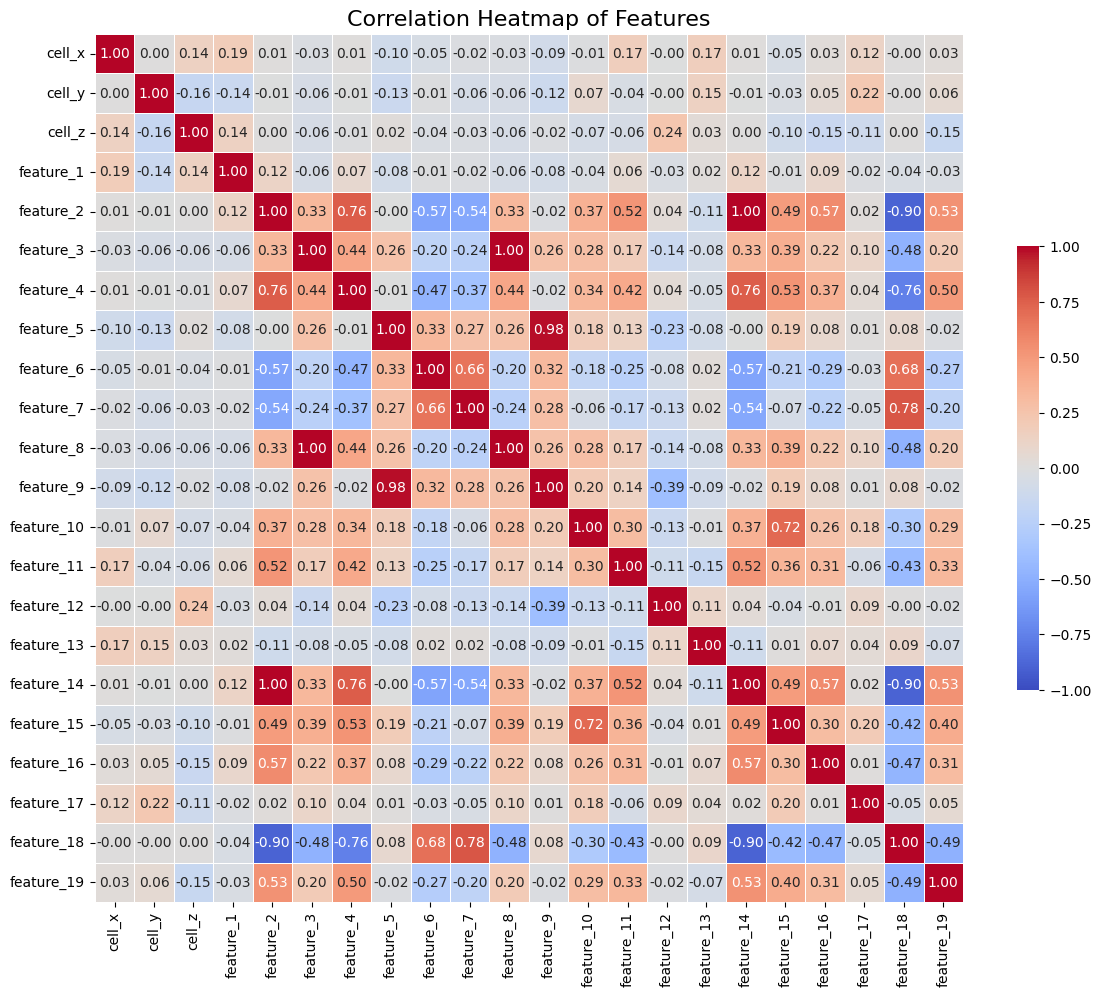

In [128]:
visualize_heat_map(df)

Number of features available:  22
Number of samples available:  171
Available Features' Names:  ['cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']


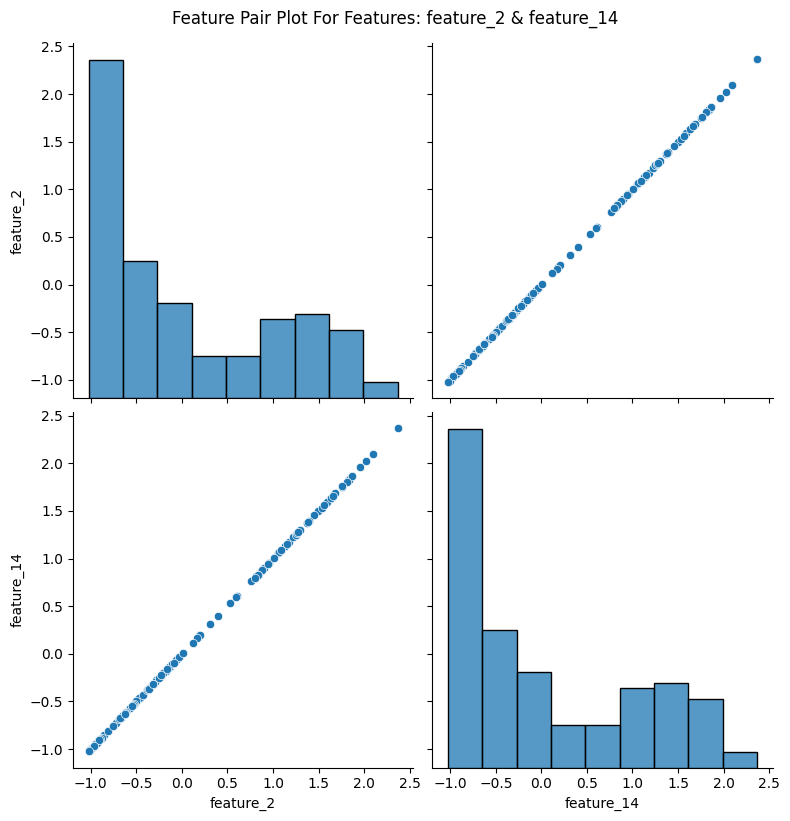

Number of features available:  22
Number of samples available:  171
Available Features' Names:  ['cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']


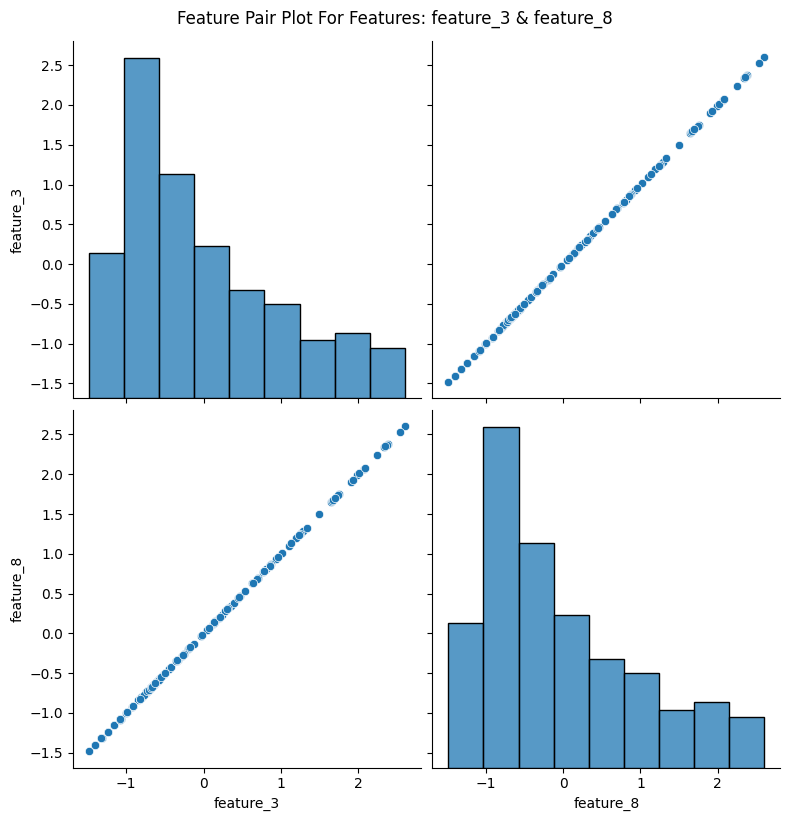

Number of features available:  22
Number of samples available:  171
Available Features' Names:  ['cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']


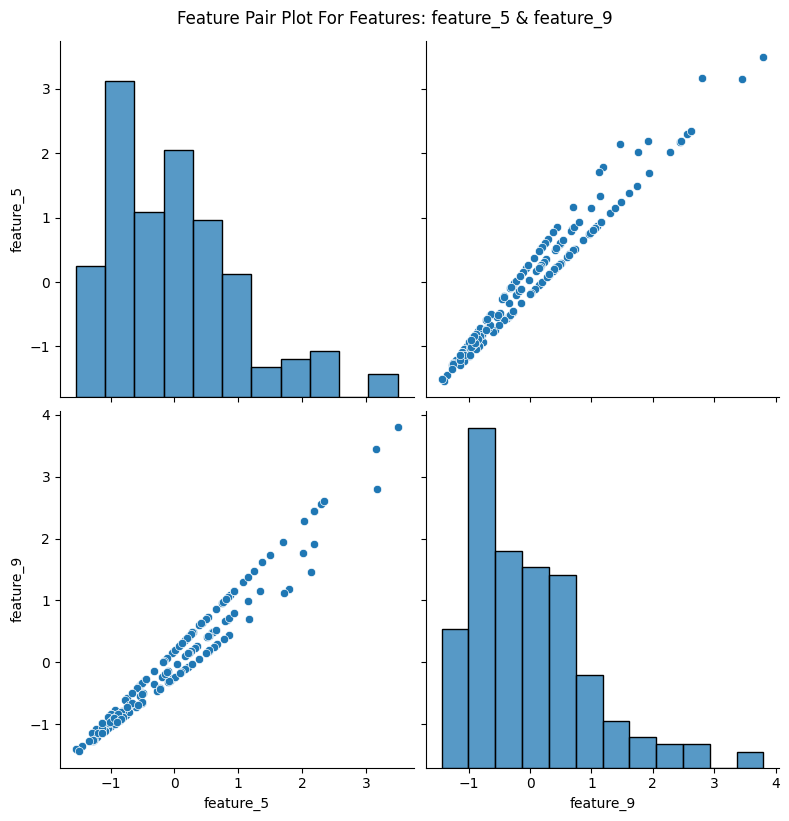

Number of features available:  22
Number of samples available:  171
Available Features' Names:  ['cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']


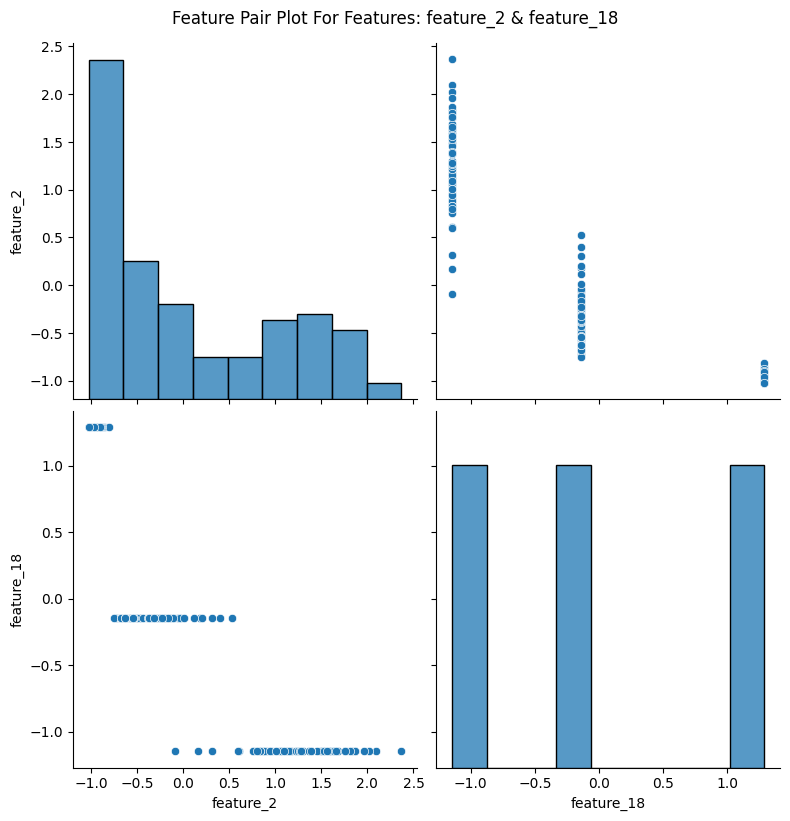

Number of features available:  22
Number of samples available:  171
Available Features' Names:  ['cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']


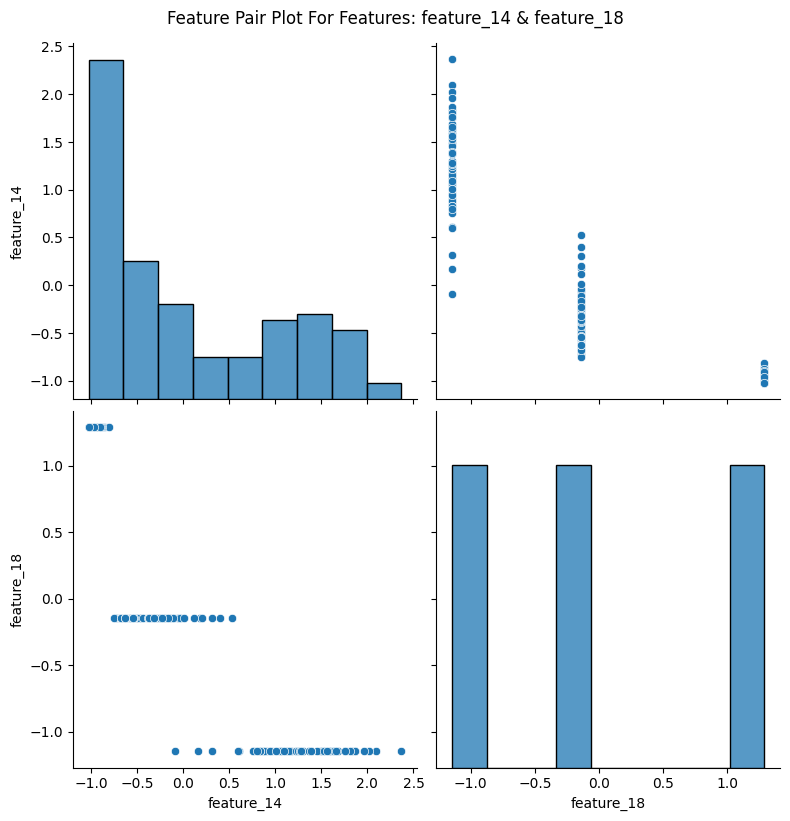

Number of features available:  22
Number of samples available:  171
Available Features' Names:  ['cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']


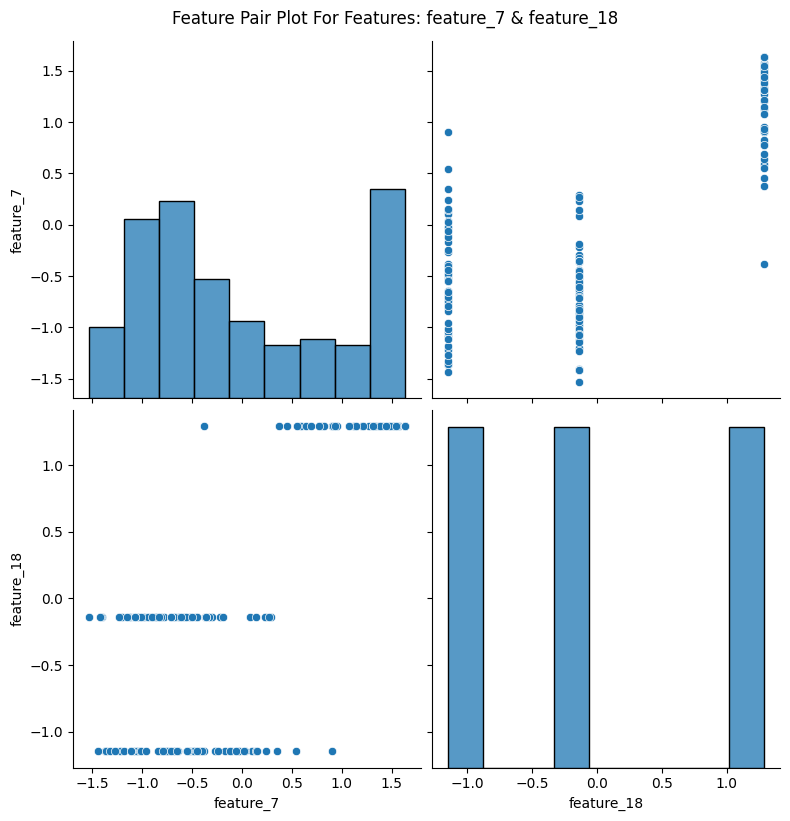

Number of features available:  22
Number of samples available:  171
Available Features' Names:  ['cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']


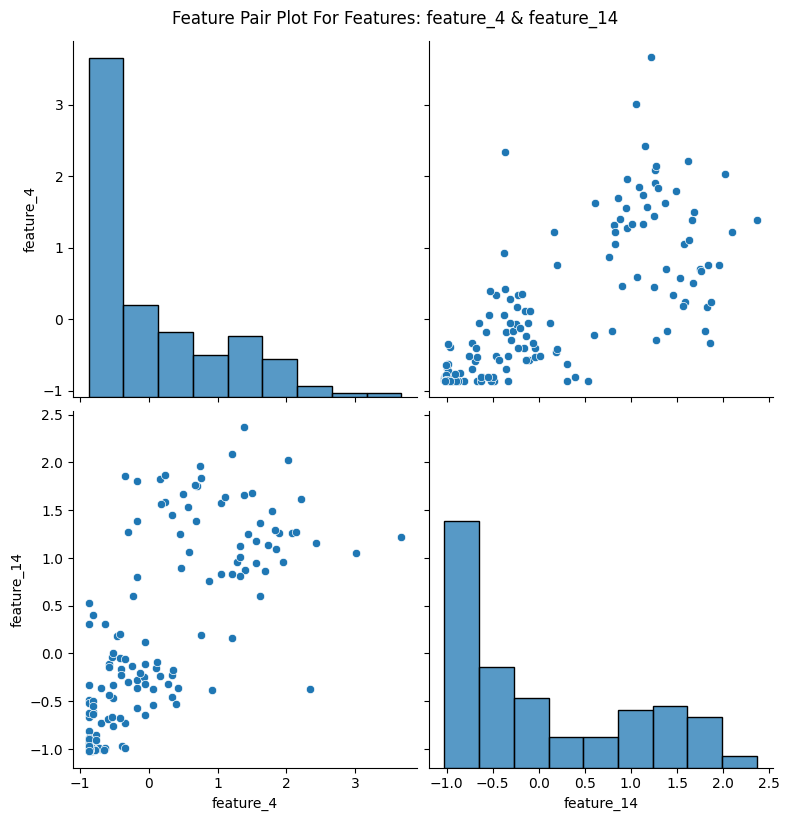

Number of features available:  22
Number of samples available:  171
Available Features' Names:  ['cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']


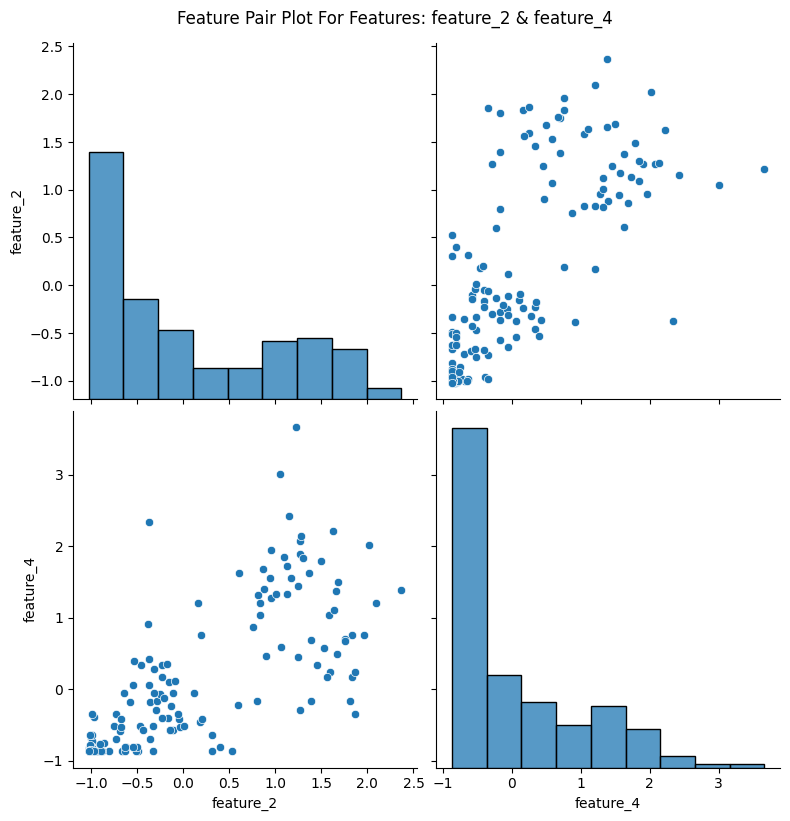

Number of features available:  22
Number of samples available:  171
Available Features' Names:  ['cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19']


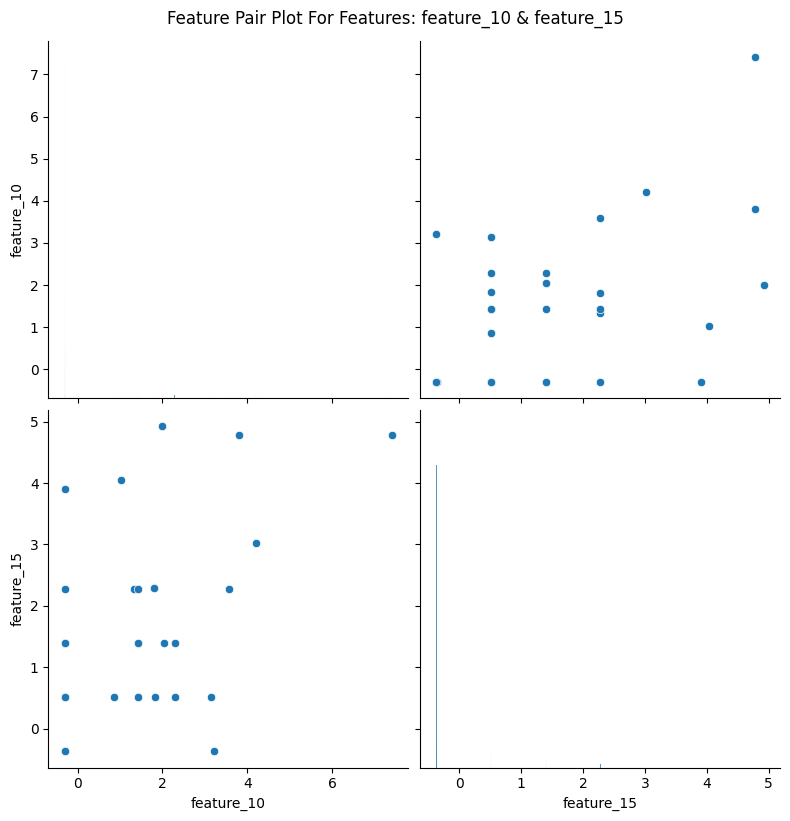

In [129]:
visualize_pair_plot(df, 'feature_2', 'feature_14')    # can be represented by a perfect straight line (corr=1)
visualize_pair_plot(df, 'feature_3', 'feature_8')     # can be represented by a perfect straight line (corr=1)

visualize_pair_plot(df, 'feature_5', 'feature_9')     # can be represented by a straight line (corr=0.98)

visualize_pair_plot(df, 'feature_2', 'feature_18')    # can be represented by a horizontal line after ignoring the outliers (a negative relationship , corr= -0.9)
visualize_pair_plot(df, 'feature_14', 'feature_18')   # can be represented by a horizontal line after ignoring the outliers (a negative relationship , corr= -0.9)

visualize_pair_plot(df, 'feature_7', 'feature_18')    # can be represented by a horizontal line (corr=0.78)

visualize_pair_plot(df, 'feature_4', 'feature_14')    # slightly forms a straight line (corr=0.76)
visualize_pair_plot(df, 'feature_2', 'feature_4')     # slightly forms a straight line, by ignoring the outliers (corr=0.76)

visualize_pair_plot(df, 'feature_10', 'feature_15')   # roughly forms a straight line (the least correlation of the features plotted , corr=0.72)

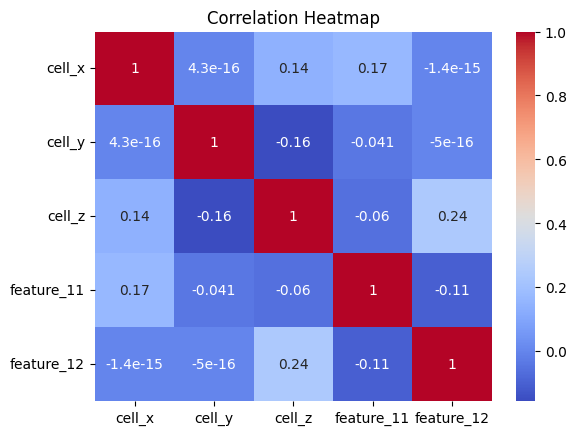

In [130]:
visualize_heatmap_spatial_data(df)

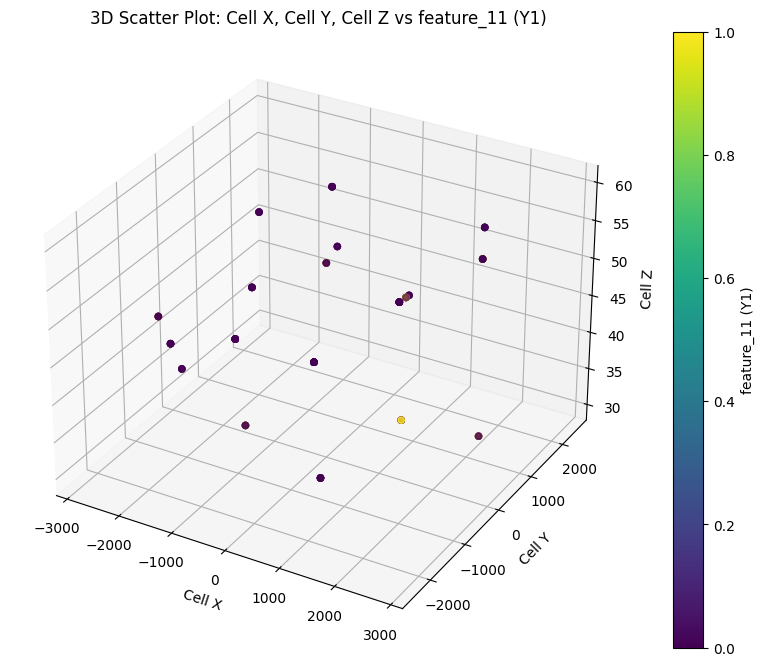

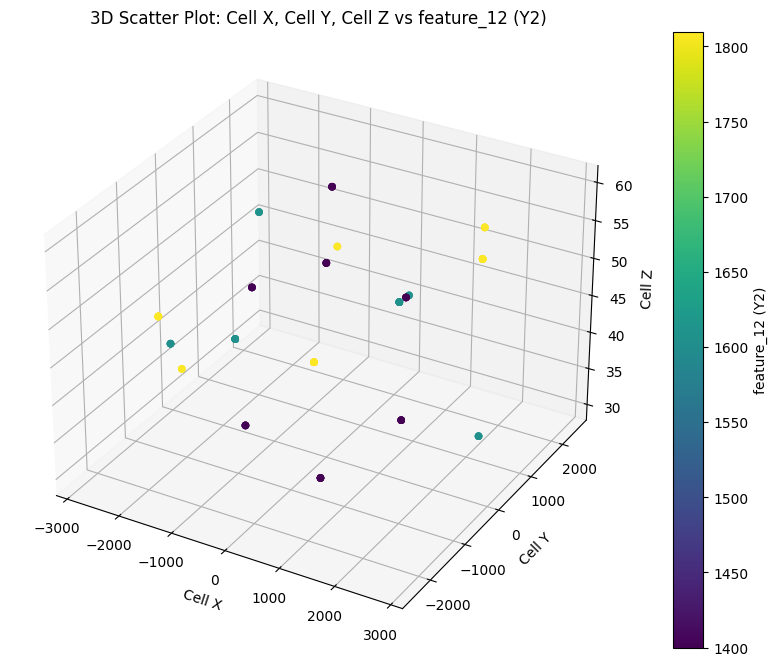

In [131]:
visualize_3d_scatter_plot_spatial_data(df)

### **Section 2. Create a new combined csv file for the task**

In this section a csv file will be created in order for us to train our model efficiently. The csv file will be named as "combined_csv.csv", this file will include our features as stated in the task as well as their corresponding targets (feature_11, feature_12 as they will be treated as the response variables: "Y1, Y2"). The features would be all of the features of a certain day (except feature_11 & feature_12) combined with all the features from the lagged/previous day, also cell_x, cell_y, cell_z, cell_no would be used in training our model (comes from the fact that each cell doesn't have a unique location, thus we must incorporat its id, since each cell may have a different physical characteristics for example that affect it other than the spatial location). Also an encoding for feature_11 was done to ensure the integrity of our data (converted/mapped from true/false to 1/0).

In [132]:
def create_csv(root_dir):

  """
  Function to create the csv file which would include the data to be used for training & evaluation, where each record would represent the cell_id + cell_x + cell_y + cell_z + lag_features(except for feature_11 & feature_12)  + current features

  Parameters:
  root_dir: The root directory of the csv files

  Returns:
  None

  """

  # Navigate to the root directory of the csv files and get their names
  files = os.listdir(root_dir)
  print("Files Names: ", files)

  # Define a mapping for the 'feature_11' column. i.e convert from boolean to integer type, where a value of 'True' translates to '1' and a value of 'False' translates to '0'
  feature_11_mapping = {
                    True: 1,
                    False: 0,
                    }

  # File path for the new csv file
  csv_file_path = 'combined_csv.csv'
  # Create an empty csv file
  with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
  print(f"Empty CSV file '{csv_file_path}' created successfully.")


  # For each csv file of a certain day combine it with the next day and save the result in our newly created file
  for file_idx in range(1, len(files)):

    # Reading 2 consecutive csv files (which represent the data for 2 consecutive days)
    file_2_idx = str(file_idx+1)
    df1 = pd.read_csv(os.path.join(task_1_dir, 'features_day'+str(file_idx)+'.csv'))  # Reading the first file
    # Apply the mapping to the boolean column of the 1st csv file
    df1['feature_11'] = df1['feature_11'].map(feature_11_mapping)

    df2 = pd.read_csv(os.path.join(task_1_dir, 'features_day'+file_2_idx+'.csv'))    # Reading the second file
    # Apply the mapping
    df2['feature_11'] = df2['feature_11'].map(feature_11_mapping)
    # Rename the overlapping columns in the second DataFrame except for the 'cell_id' column, which would be used for joining the 2 files (since both csv files would include the same header names, so to avoid conflict or any feature loss we rename the features from the second dataframe)
    df2_renamed = df2.drop(['feature_11', 'feature_12', 'cell_x', 'cell_y', 'cell_z'], axis=1).rename(columns={col: f'{col}_from_df2' for col in df2 if col != 'cell_id'}) # Remove the targeted columns from the df

    # Get our target outputs, which would be feature_11 & feature_12 from the second day (2nd csv file = 2nd dataframe)
    y = df2[['cell_id', 'feature_11', 'feature_12']].rename(columns={'feature_11': 'y1', 'feature_12': 'y2'})

    # Merge the 2 dataframes/csv_files after renaming the fearures from the 2nd dataframe , then merge them with the targeted outputs
    output = pd.merge(df1, df2_renamed, on='cell_id', how='inner')
    # Merge the result with targeted features y on 'cell_id'
    output = pd.merge(output, y, on='cell_id', how='inner')
    # Introduce a day number , which would represent a sequential data for our model to understand (serves as an alternative to timestamp to ensure we capture the trends related to the sequence of events)
    output['day'] = file_idx

    # Check if the CSV file is empty
    if os.stat(csv_file_path).st_size == 0:
        # Save the new data as the header row is not present
        output.to_csv(csv_file_path, index=False)
    else:
        # Load the existing CSV file
        df_existing = pd.read_csv(csv_file_path)
        # Append the new rows to the existing DataFrame
        df_combined = pd.concat([df_existing, output], ignore_index=True)
        # Save the merged DataFrame to the CSV file
        df_combined.to_csv(csv_file_path, index=False)

    print(f"Processed and updated '{csv_file_path}' with new data.")  # CSV File updated successfully with our data

  # Print a confirmation message
  print(f"CSV file '{csv_file_path}' created successfully.")

In [133]:
# Create the combined csv file for all the days
create_csv(task_1_dir)
# Read the final/combined csv file
df_combined = pd.read_csv('combined_csv.csv')


# Examine our new data frame
df_combined

Files Names:  ['features_day1.csv', 'features_day15.csv', 'features_day5.csv', 'features_day4.csv', 'features_day6.csv', 'features_day11.csv', 'features_day10.csv', 'features_day2.csv', 'features_day14.csv', 'features_day7.csv', 'features_day9.csv', 'features_day8.csv', 'features_day12.csv', 'features_day3.csv', 'features_day13.csv']
Empty CSV file 'combined_csv.csv' created successfully.
Processed and updated 'combined_csv.csv' with new data.
Processed and updated 'combined_csv.csv' with new data.
Processed and updated 'combined_csv.csv' with new data.
Processed and updated 'combined_csv.csv' with new data.
Processed and updated 'combined_csv.csv' with new data.
Processed and updated 'combined_csv.csv' with new data.
Processed and updated 'combined_csv.csv' with new data.
Processed and updated 'combined_csv.csv' with new data.
Processed and updated 'combined_csv.csv' with new data.
Processed and updated 'combined_csv.csv' with new data.
Processed and updated 'combined_csv.csv' with ne

,cell_id,cell_x,cell_y,cell_z,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_13_from_df2,feature_14_from_df2,feature_15_from_df2,feature_16_from_df2,feature_17_from_df2,feature_18_from_df2,feature_19_from_df2,y1,y2,day
0,0,1400.0,1.136868e-13,36.0,0.0,5.628905e+07,5.276937e+07,1.182938e+08,1441.167582,0.211673,...,8.0,4.212047e+07,7.161983e+06,0.026248,0.214286,5.803571e+07,0.325298,1,1400.000000,1
1,1,1400.0,1.136868e-13,36.0,2.0,1.448895e+07,8.940317e+06,4.589672e+03,565.106185,0.251047,...,9.0,1.612118e+07,2.624299e+03,0.000162,0.142857,8.125000e+07,0.000009,0,1400.000000,1
2,2,1400.0,1.136868e-13,36.0,0.0,4.619858e+06,1.917261e+07,3.462102e+06,2045.724566,0.739179,...,4.0,4.746517e+06,2.079571e+02,0.000043,0.142857,1.142857e+08,0.000146,0,1400.000000,1
3,3,1400.0,1.136868e-13,36.0,3.0,7.812103e+07,2.953364e+07,1.607711e+07,1974.726563,0.027794,...,5.0,7.546562e+07,1.429363e+03,0.330807,0.071429,5.803571e+07,0.036902,1,1400.000000,1
4,4,1400.0,1.136868e-13,36.0,0.0,8.155186e+06,8.916038e+07,5.362047e+06,2307.346745,0.476142,...,9.0,1.284810e+07,3.160310e+03,0.000015,0.107143,8.125000e+07,0.000147,0,1400.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,166,1400.0,2.424871e+03,52.0,0.0,1.914885e+07,3.188155e+07,4.382650e+07,747.373275,0.037736,...,4.0,2.013173e+07,3.902869e+03,0.000007,0.214286,8.125000e+07,0.000008,0,1809.948452,14
2390,167,1400.0,2.424871e+03,52.0,0.0,1.627090e+06,1.251337e+07,7.186093e+03,1587.668871,0.385362,...,11.0,1.627090e+06,3.573406e+02,0.000183,0.250000,1.142857e+08,0.000115,0,1809.948452,14
2391,168,1400.0,2.424871e+03,52.0,3.0,6.555132e+07,2.652394e+07,8.998928e+07,1675.641612,0.055155,...,8.0,6.239164e+07,9.235101e+03,0.030663,0.142857,5.803571e+07,0.064452,0,1809.948452,14
2392,169,1400.0,2.424871e+03,52.0,0.0,2.565979e+07,7.805184e+07,1.251396e+07,1493.734756,0.336235,...,8.0,2.664671e+07,5.840365e+03,0.000021,0.125000,8.125000e+07,0.000026,0,1809.948452,14


In [134]:
# Get the keys of our columns
df_combined.keys()

Index(['cell_id', 'cell_x', 'cell_y', 'cell_z', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_1_from_df2', 'feature_2_from_df2',
       'feature_3_from_df2', 'feature_4_from_df2', 'feature_5_from_df2',
       'feature_6_from_df2', 'feature_7_from_df2', 'feature_8_from_df2',
       'feature_9_from_df2', 'feature_10_from_df2', 'feature_13_from_df2',
       'feature_14_from_df2', 'feature_15_from_df2', 'feature_16_from_df2',
       'feature_17_from_df2', 'feature_18_from_df2', 'feature_19_from_df2',
       'y1', 'y2', 'day'],
      dtype='object')

In [135]:
# Get the data type assigned to each column
df_combined.dtypes

,0
cell_id,int64
cell_x,float64
cell_y,float64
cell_z,float64
feature_1,float64
feature_2,float64
feature_3,float64
feature_4,float64
feature_5,float64
feature_6,float64


In [136]:
# Get the shape of our csv file
df_combined.shape

(2394, 43)

In [137]:
# Check if there is any null values in our records
df_combined.isnull().sum()

,0
cell_id,0
cell_x,0
cell_y,0
cell_z,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0


In [138]:
# Remove duplicate values
df_combined = df_combined.drop_duplicates()

df_combined.shape

(2394, 43)

### **Section 3. Visualize the Features' Distributions to determine the most appropriate feature scaling technique (normalization/standardization)**

In this section we will be performing normalization/standardization on our data, this comes from the fact that each feature has a different scale than that of the other features which may affect the model's performance. But Before that a focus on the distribution of each feature was done using histograms in order to observe how each feature is distributed and if there are any outliers (and if outliers are present are they dominant or just occasional in certain features). After the observation of the histograms it was clear that most features don't possess a vaguely normal distribution (almost the half), and after observing the box plots it was clear that many features had observable outliers. Following the mentioned observations it was decided that a min max scaler would work best (thus normalization).

**Related Links:**
1. https://developers.google.com/machine-learning/crash-course/numerical-data/normalization
2. https://www.datacamp.com/tutorial/normalization-in-machine-learning



In [139]:
def box_plot(df):

  """
  Function to visualize the outliers for each feature using box plots to help understand the distribution of features

  Parameters:
  df: The df of the csv file we are interested in.

  Returns:
  None

  """

  # Plot box plots for each feature
  plt.figure(figsize=(20, 15))
  for i, column in enumerate(df.columns):
      plt.subplot(8, 6, i+1)  # Adjust subplot grid size based on number of features
      sns.boxplot(df[column])
      plt.title(column, fontsize=8)
      plt.xticks(rotation=45)
  #plt.tight_layout()
  plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between subplots
  plt.show()

In [140]:
def features_histogram(df):

  """
  Function to visualize the distribution of each feature using histograms (helps in determining which approach to take: normalization or standardization)

  Parameters:
  df: The df of the csv file we are interested in.

  Returns:
  None

  """

  # Plot histograms for each feature
  df.hist(bins=50, figsize=(20, 15))
  plt.suptitle('Histograms of Features')
  plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between subplots
  #plt.tight_layout()
  plt.show()

In [141]:
def features_kde(df):

  """
  Function to visualize the distribution of each feature using density functions (kde) (helps in determining which approach to take: normalization or standardization)

  Parameters:
  df: The df of the csv file we are interested in.

  Returns:
  None

  """

  plt.figure(figsize=(20, 15))
  for i, column in enumerate(df.columns):
      plt.subplot(8, 6, i+1)  # Adjust subplot grid size based on number of features
      sns.kdeplot(df[column], fill=True)
      plt.title(column, fontsize=8)
      plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [142]:
def normalize_features(df):

  """
  Function to normalize the features using MinMax scaler after visualizing the df distribution

  Parameters:
  df: The df of the csv file we are interested in.

  Returns:
  df_normalized: The df with the normalized features after one-hot encoding the cell_id

  """

  # Add one-hot encoding for cell_id
  df = pd.get_dummies(df, columns=['cell_id'], prefix='cell')

  # Initialize the MinMaxScaler
  scaler = MinMaxScaler() # scaler = StandardScaler()
  # Select the features to normalize
  features = df.drop(['y1', 'y2'], axis=1)
  # Apply the scaler to the features
  normalized_features = scaler.fit_transform(features)

  # Create a new DataFrame with the normalized features
  df_normalized = pd.DataFrame(normalized_features, columns=features.columns)

  # If you want to include the target column in the normalized DataFrame
  df_normalized['y1'] = df['y1']
  df_normalized['y2'] = df['y2']

  # df_normalized.head()

  return df_normalized

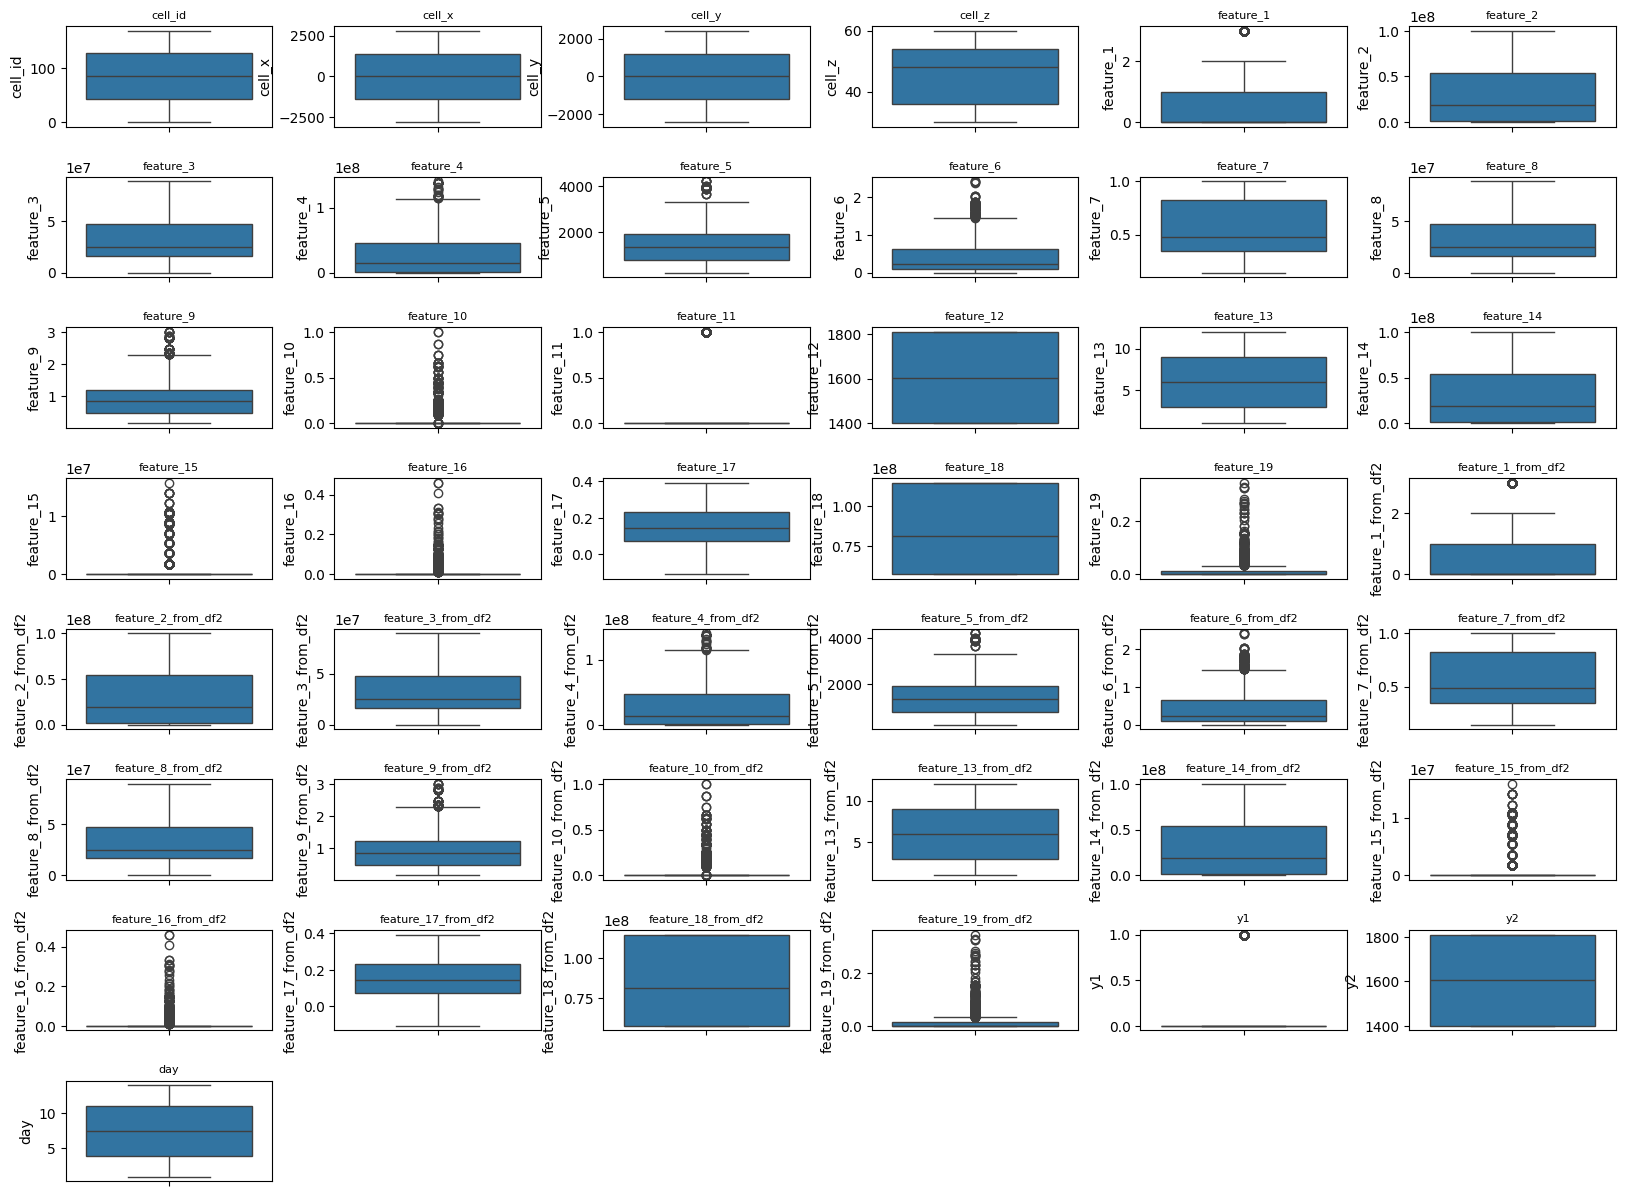

In [143]:
box_plot(df_combined)

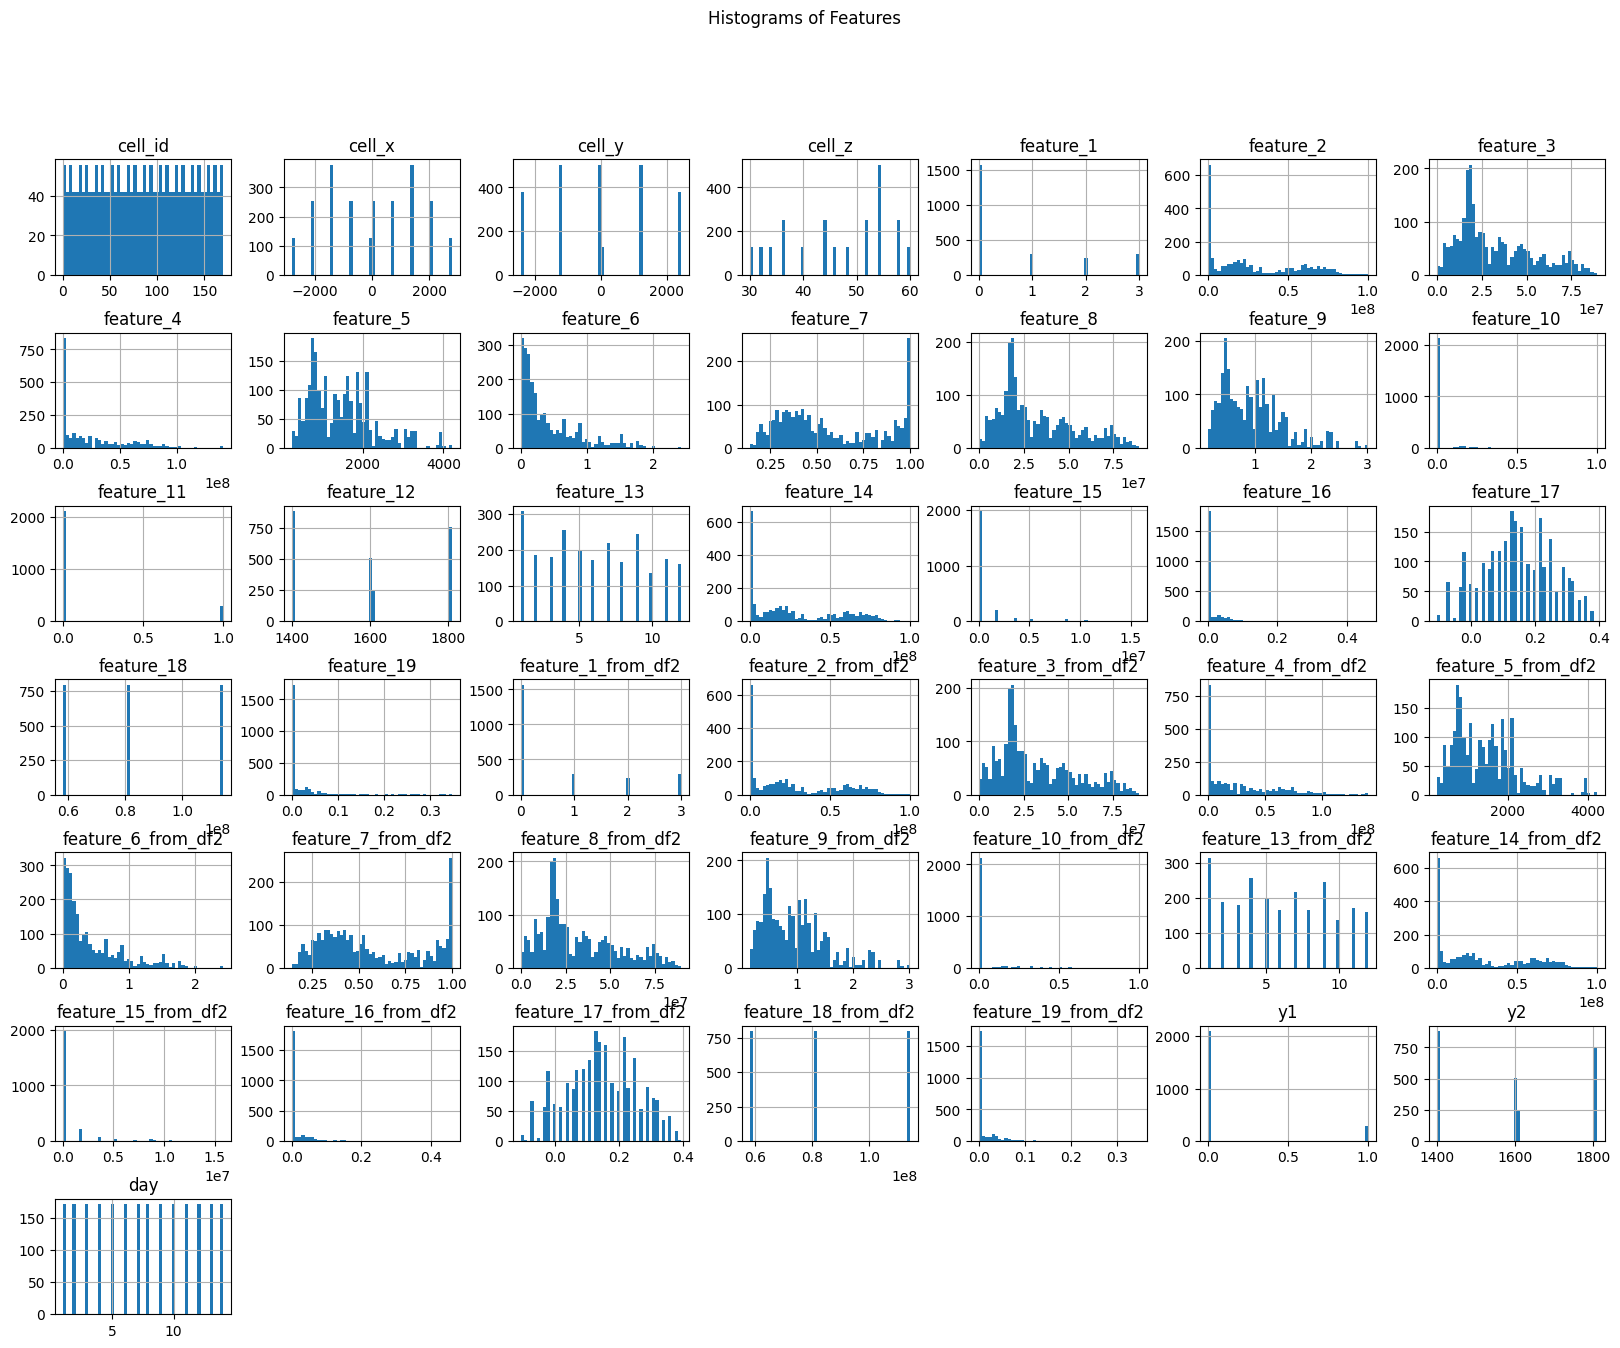

In [144]:
features_histogram(df_combined)

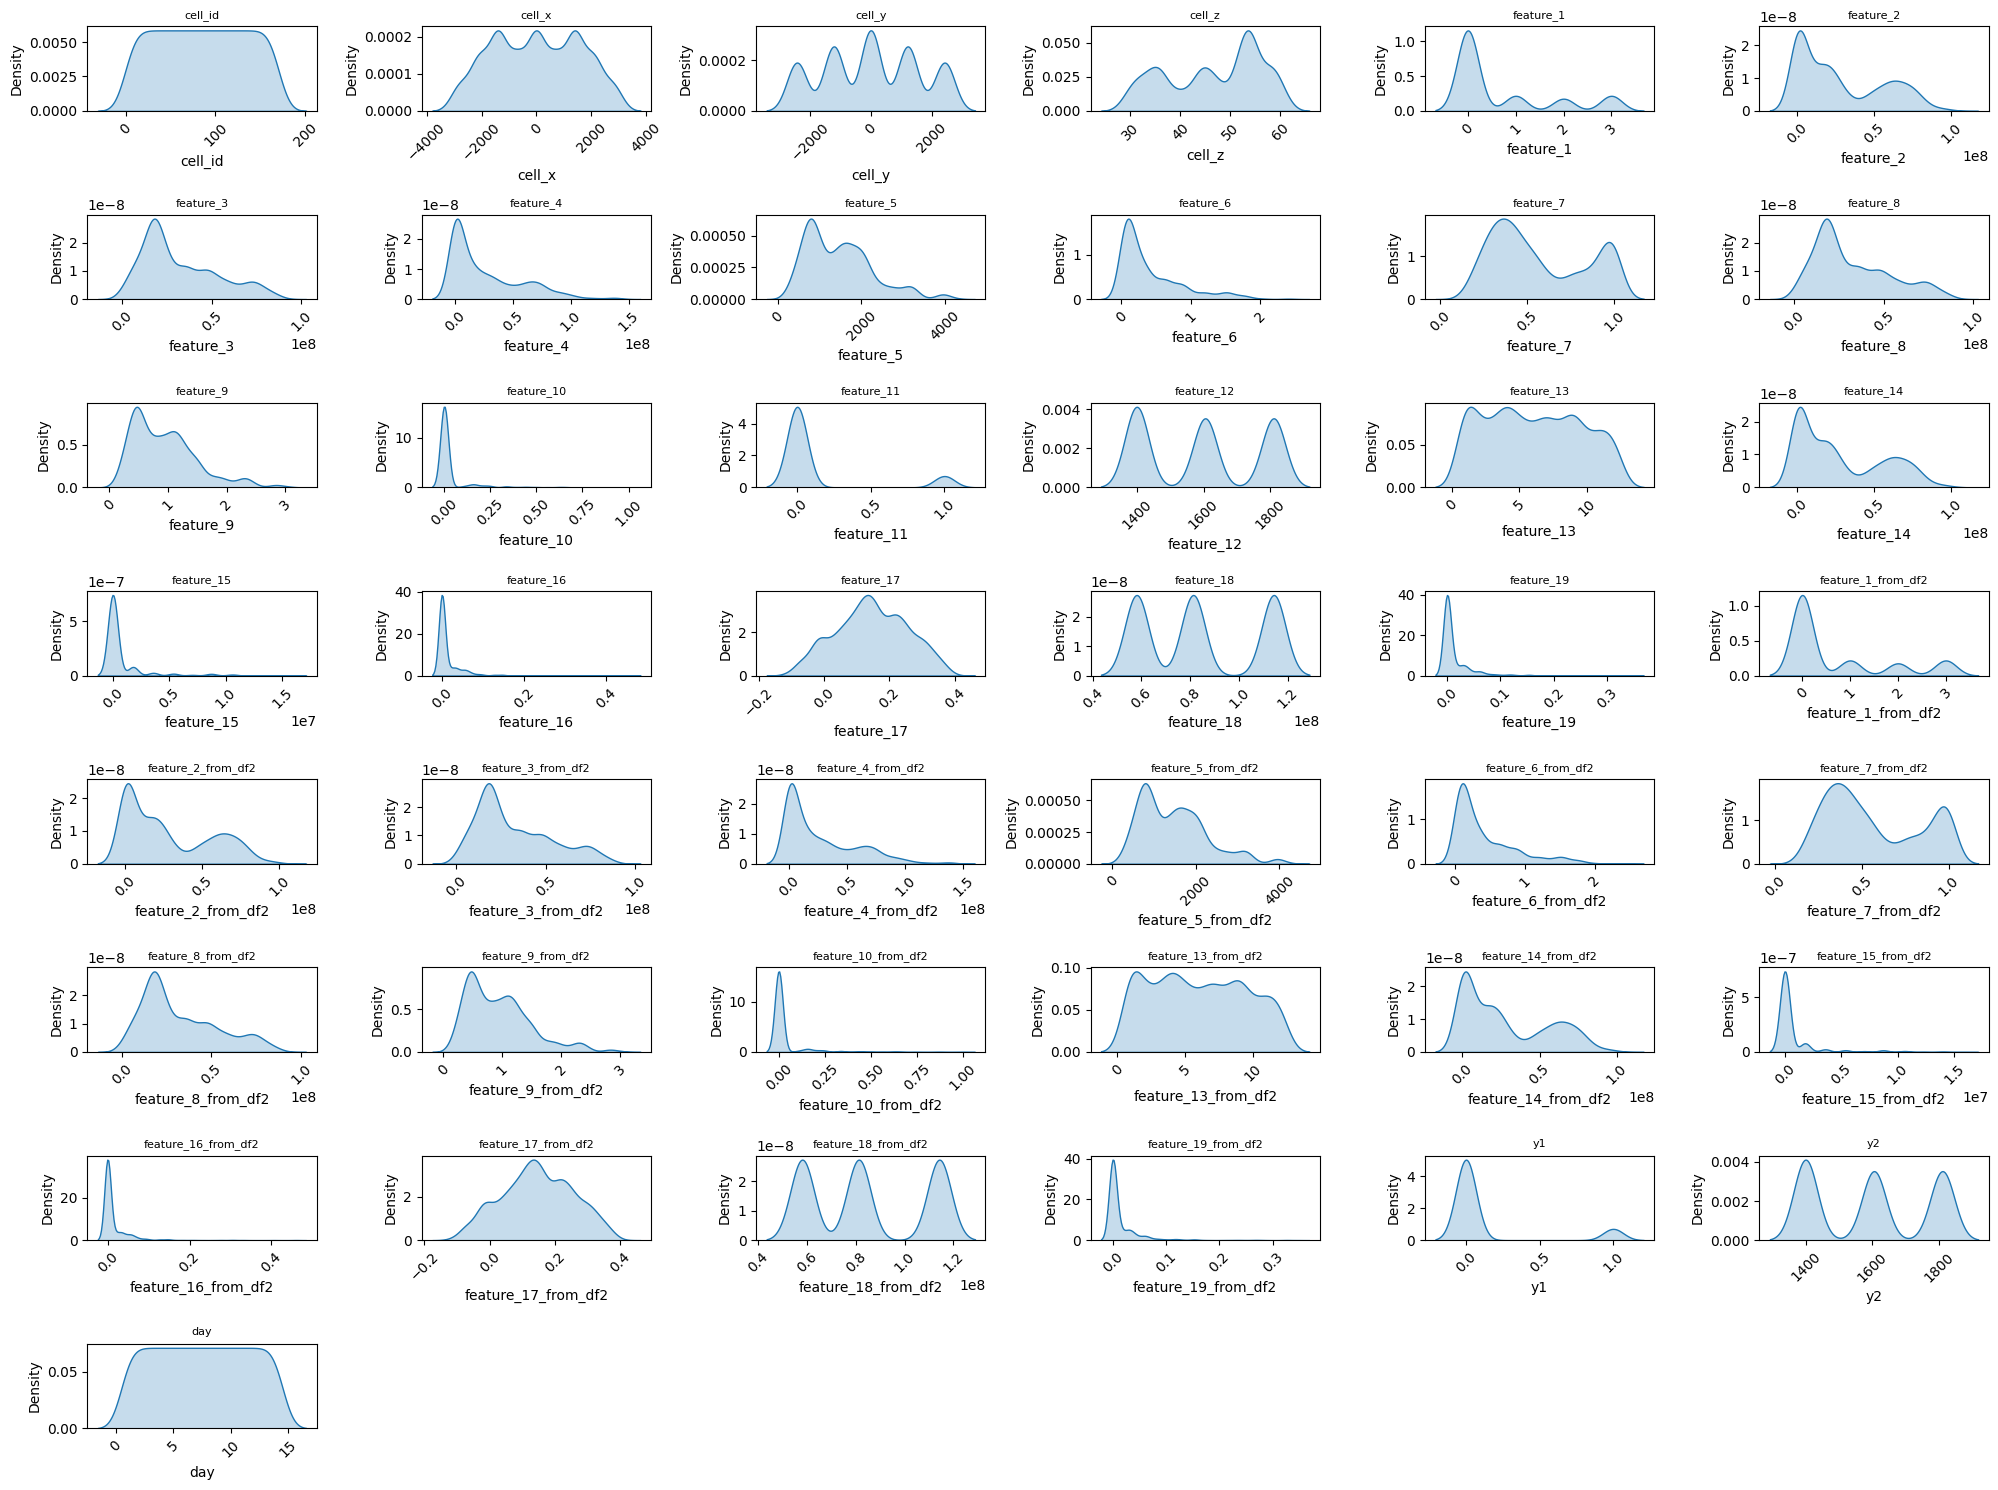

In [145]:
features_kde(df_combined)

In [146]:
# Summary statistics
df_combined.describe()

,cell_id,cell_x,cell_y,cell_z,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_13_from_df2,feature_14_from_df2,feature_15_from_df2,feature_16_from_df2,feature_17_from_df2,feature_18_from_df2,feature_19_from_df2,y1,y2,day
count,2394.000000,2.394000e+03,2.394000e+03,2394.000000,2394.000000,2.394000e+03,2.394000e+03,2.394000e+03,2394.000000,2394.000000,...,2394.000000,2.394000e+03,2.394000e+03,2394.000000,2394.000000,2.394000e+03,2394.000000,2394.000000,2394.000000,2394.000000
mean,85.000000,-3.647097e-14,-1.474035e-13,46.631579,0.690058,2.829578e+07,3.226591e+07,2.656079e+07,1468.641250,0.420676,...,6.031328,2.825299e+07,7.485546e+05,0.014280,0.145155,8.452381e+07,0.014280,0.122807,1594.186109,7.500000
std,49.372917,1.573793e+03,1.573793e+03,9.316397,1.072395,2.759465e+07,2.128286e+07,3.086659e+07,800.171178,0.453245,...,3.482189,2.756017e+07,2.111917e+06,0.037664,0.108836,2.308517e+07,0.034955,0.328284,169.240357,4.031971
min,0.000000,-2.800000e+03,-2.424871e+03,30.000000,0.000000,1.980031e+03,9.659600e+03,7.137173e+02,242.178160,0.000014,...,1.000000,1.980031e+03,0.000000e+00,0.000000,-0.107143,5.803571e+07,0.000000,0.000000,1400.000000,1.000000
25%,42.000000,-1.400000e+03,-1.212436e+03,36.000000,0.000000,1.627245e+06,1.671703e+07,6.602899e+05,804.550222,0.093478,...,3.000000,1.627090e+06,2.257099e+02,0.000013,0.071429,5.803571e+07,0.000018,0.000000,1400.000000,4.000000
50%,85.000000,4.733991e-13,0.000000e+00,48.000000,0.000000,1.908316e+07,2.473578e+07,1.429077e+07,1374.593864,0.229859,...,6.000000,1.911107e+07,3.160310e+03,0.000054,0.142857,8.125000e+07,0.000086,0.000000,1604.974226,7.500000
75%,128.000000,1.400000e+03,1.212436e+03,54.000000,1.000000,5.394649e+07,4.740402e+07,4.609801e+07,1931.042295,0.639368,...,9.000000,5.394587e+07,7.599190e+03,0.000939,0.232143,1.142857e+08,0.013139,0.000000,1809.948452,11.000000
max,170.000000,2.800000e+03,2.424871e+03,60.000000,3.000000,1.001178e+08,8.916038e+07,1.406810e+08,4211.536154,2.420182,...,12.000000,1.001158e+08,1.581616e+07,0.461036,0.392857,1.142857e+08,0.346937,1.000000,1809.948452,14.000000


In [147]:
df_normalized = normalize_features(df_combined)
df_normalized.head()

,cell_x,cell_y,cell_z,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,cell_163,cell_164,cell_165,cell_166,cell_167,cell_168,cell_169,cell_170,y1,y2
0,0.75,0.5,0.2,0.000000,0.562220,0.591804,0.840865,0.302061,0.087456,0.479559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1400.0
1,0.75,0.5,0.2,0.666667,0.144702,0.100175,0.000028,0.081355,0.103726,0.324088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1400.0
2,0.75,0.5,0.2,0.000000,0.046125,0.214950,0.024605,0.454367,0.305419,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1400.0
3,0.75,0.5,0.2,1.000000,0.780287,0.331169,0.114276,0.436481,0.011479,0.298060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1400.0
4,0.75,0.5,0.2,0.000000,0.081438,1.000000,0.038110,0.520278,0.196734,0.305271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1400.0


### **Section 4. Building & Evaluating our Model**

This represents our final section for this part. In this section a model is trained and evaluated using our train and test datasets (after splitting our dataset to a ratio of 80:20 to ensure that the model is trained on a substantial portion of the data while preserving a part for evaluating how well the model generalizes to unseen data). In the choice of model selection it was decided that ensemble models like Random Forest & XGBoost are best for this specific task where also spatial data is incorporated in our dataset [1][2] (some related links can be found below). Following this information Random Forest Regressor was used for our task (since we are dealing with numerical continous values, not categorical).

For the evaluation step R-squared was used along with Mean Squared Error (MSE) and Mean Absolute Error (MAE), these metrics were calculated for each targeted feature separatly, to assess the performance of the model with each targeted feature. Why these specific metrics ? well beside them being reputable in the regression tasks, they can provide very well picture of how our model is behaving. R-squared (which ranges from 0 to 1) can tell us how our choice of the features affected the performance of the model (by capturing the most important patterns and relations), where both features showed a value of 1 showing that the variance in the targeted features was completely explained by our choice of the features (likely because the data is clean and free of noise and irrelevant data). For the Mean Absolute Error, unlike the R-Squared it doesn't tell us how our model well behaved, but on the contrary how it misbehaved by absoluting the difference between the predicted value and the real value for each targeted value, this metric is considered the most straight forward and interpretable one for us humans to understand (feature_11 had a value of 0 which is superb, while feature_12 had a very small value which isn't bad at all for a simple model choice and relatively small dataset in the Machine Learning world). For the Mean Squared Error (MSE), it is a modification of the Mean Absolute Error (MAE) by penalizing large errors (by giving higher weights on larger errors), this metric had a value of 0 for feature_11 but for feature_12 it also had a very small value just like the case in Mean Absolute Error (MAE). In general the performance of the model is very good, but maybe with more training, another model choice, applying different techniques (like cross validation and tuning) and like always the curse of having more data :( a better performance for feature_12 can be seen.

[1]. https://www.scirp.org/journal/paperinformation?paperid=133783

[2]. https://www.kaggle.com/code/kobbiemanrique/tabular-data-in-the-age-of-ai

In [148]:
def split_dataset(df, test_size=0.2):

  """
  Function to split our data into training & testing sets

  Parameters:
  df: The df of the csv file we are interested in (after normalization).
  test_size: The size of the test set

  Returns:
  X_train: The training features
  X_test: The testing features
  y_train: The training target
  y_test: The testing target

  """

  # Features and target
  X = df.drop(['day', 'y1', 'y2'], axis=1)  # df.drop(['cell_id', 'day', 'y1', 'y2'], axis=1)
  y = df[['y1', 'y2']]

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  return X_train, X_test, y_train, y_test

In [149]:
def train_model(X_train, X_test, y_train, y_test):

  """
  Function to train the model using Random Forest Regressor

  Parameters:
  X_train: The training features
  X_test: The testing features
  y_train: The training target
  y_test: The testing target

  Returns:
  model: The trained model
  y_pred: The predictions of the model

  """


  # Initialize and train the multi-output model
  model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
  model.fit(X_train, y_train)

  # Make predictions and evaluate
  y_pred = model.predict(X_test)

  return model, y_pred

In [150]:
def evaluate_model(X_test, y_pred, y_test):

  """
  Function to evaluate the model

  Parameters:
  X_test: The testing features
  y_pred: The predictions of the model
  y_test: The testing target

  Returns:
  None

  """


  mse_11 = mean_squared_error(y_test['y1'], y_pred[:, 0])
  mae_11 = mean_absolute_error(y_test['y1'], y_pred[:, 0])
  r2_11 = r2_score(y_test['y1'], y_pred[:, 0])

  mse_12 = mean_squared_error(y_test['y2'], y_pred[:, 1])
  mae_12 = mean_absolute_error(y_test['y2'], y_pred[:, 1])
  r2_12 = r2_score(y_test['y2'], y_pred[:, 1])

  print(f'Random Forest R^2 Score for feature_11: {r2_11}\n')
  print(f'Random Forest Mean Absolute Error (MAE) for feature_11: {mae_11}')
  print(f'Random Forest Mean Squared Error (MSE) for feature_11: {mse_11}')

  print(f'Random Forest R^2 Score for feature_12: {r2_12}\n')
  print(f'Random Forest Mean Absolute Error (MAE) for feature_12: {mae_12}')
  print(f'Random Forest Mean Squared Error (MSE) for feature_12: {mse_12}')

In [151]:
X_train, X_test, y_train, y_test = split_dataset(df_normalized)

In [152]:
model, y_pred = train_model(X_train, X_test, y_train, y_test)

In [153]:
evaluate_model(X_test, y_pred, y_test)

Random Forest R^2 Score for feature_11: 1.0

Random Forest Mean Absolute Error (MAE) for feature_11: 0.0
Random Forest Mean Squared Error (MSE) for feature_11: 0.0
Random Forest R^2 Score for feature_12: 1.0

Random Forest Mean Absolute Error (MAE) for feature_12: 3.2060162921578064e-12
Random Forest Mean Squared Error (MSE) for feature_12: 1.8185021796429348e-23


# **Part 2: Text2Pandas command engine**

Two approaches to construct the Text2Pandas command engine:

**1. First approach:** depends on fully automating the process using llm models like (LLama3, open source model) and Pandasai framework , to perform question answering on our dataframe (**Section 2**)



**2. Second approach:** depends on using llm models like (LLama3, open source model) to extract information in the form of a dictionary, the dictionary will always have the same structure meaning the same keys and only the values of the keys will change based on the parsed data from the llm, and then using the parsed data we would map the values present in it with a predefined python code which will generate the pandas commands (**Section 3**)

In [154]:
# Required Libraries to install (Assuming you are using Google Colab)
!pip install pandasai
!pip install langchain
!pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.5/334.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: sqlglot
    Found existing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 942.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 1.8 MB/s eta 0:00:00


In [155]:
import re
import os
import ast
import sys
import json
import uuid
import logging
import pandas as pd
from pandasai import SmartDataframe
from langchain_groq import ChatGroq
from IPython.display import Markdown, display
from typing import List, Optional, Union, Dict
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import ChatPromptTemplate, FewShotPromptTemplate, PromptTemplate, HumanMessagePromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field, validator
from langchain_core.messages import (
                                      AIMessage,
                                      BaseMessage,
                                      HumanMessage,
                                      SystemMessage,
                                      ToolMessage,
                                  )

In [156]:
# Root Directory of the csv file attached for the second task
task_2_dir = 'task2'

### **Section 1. Data Handling & Examination**

In [157]:
# Read the csv file
task_2_df = pd.read_csv(os.path.join(task_2_dir, 'task2.csv'))

In [158]:
task_2_df.head()

,cell_no,hour,month,day,year,Bandwidth,counter_0,counter_1,counter_2,counter_3,counter_4,counter_5
0,0,0,6,12,2019,10,470620,367862,214295,3592,123759,"[0.0, 513392.0, 792138.0, 47284.0, 22429.0, 15..."
1,0,1,6,12,2019,10,129657,80729,37125,2698,72283,"[0.0, 1886861.0, 1579023.0, 67836.0, 23810.0, ..."
2,0,2,6,12,2019,10,28839,18523,7949,1,21925,"[0.0, 2024560.0, 1288489.0, 213675.0, 33865.0,..."
3,0,3,6,12,2019,10,17751,17845,5292,0,10683,"[0.0, 2089627.0, 1239282.0, 231054.0, 18927.0,..."
4,0,4,6,12,2019,10,42836,35334,12739,0,24262,"[0.0, 2064013.0, 1355993.0, 132165.0, 18483.0,..."


In [159]:
# Get the names of the columns associated with that csv file
task_2_df.keys()

Index(['cell_no', 'hour', 'month', 'day', 'year', 'Bandwidth', 'counter_0',
       'counter_1', 'counter_2', 'counter_3', 'counter_4', 'counter_5'],
      dtype='object')

In [160]:
# Get the datatypes of the columns associated with that csv file
task_2_df.dtypes

,0
cell_no,int64
hour,int64
month,int64
day,int64
year,int64
Bandwidth,int64
counter_0,int64
counter_1,int64
counter_2,int64
counter_3,int64


In [161]:
# Get the shape of the dataframe
task_2_df.shape

(711432, 12)

In [162]:
# Check for any null values in that csv file
task_2_df.isnull().sum()

,0
cell_no,0
hour,0
month,0
day,0
year,0
Bandwidth,0
counter_0,0
counter_1,0
counter_2,0
counter_3,0


In [163]:
# Summary of the csv file
task_2_df.describe()

,cell_no,hour,month,day,year,Bandwidth,counter_0,counter_1,counter_2,counter_3,counter_4
count,711432.000000,711432.000000,711432.0,711432.000000,711432.0,711432.000000,7.114320e+05,7.114320e+05,7.114320e+05,7.114320e+05,7.114320e+05
mean,5052.316264,11.500000,6.0,13.003340,2019.0,13.946632,7.768739e+05,7.296818e+05,2.716741e+05,6.563258e+03,2.678636e+05
std,2917.269491,6.922191,0.0,0.815932,0.0,4.887786,1.310864e+06,1.152211e+06,4.136660e+05,2.190204e+04,4.624766e+05
min,0.000000,0.000000,6.0,12.000000,2019.0,10.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2529.000000,5.750000,6.0,12.000000,2019.0,10.000000,2.467000e+04,2.563800e+04,1.727100e+04,0.000000e+00,1.483000e+04
50%,5064.000000,11.500000,6.0,13.000000,2019.0,10.000000,2.850315e+05,2.820030e+05,1.038480e+05,3.060000e+02,8.408250e+04
75%,7589.000000,17.250000,6.0,14.000000,2019.0,20.000000,1.076867e+06,1.036334e+06,3.603205e+05,3.685000e+03,3.351872e+05
max,10086.000000,23.000000,6.0,14.000000,2019.0,20.000000,1.105076e+08,1.678519e+08,6.603080e+06,1.307764e+06,1.003652e+07


### **Section 2. First Approach: Using LLama 3 & PandasAI Integration**

In [164]:
# Function to chat with CSV data
def chat_with_csv(df, query):

    """
    Function to convert the text to pandas query directly using LLM

    Parameters:
    df: The df of the csv file we are interested in.
    query: The provided user query (text).

    Returns:
    result: The response to the query.

    """


    # API Key to be able to use the LLama3 Model
    groq_api_key = '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'

    # Initializing GROQ chat with provided API key, model name, and settings
    llm = ChatGroq(
                    groq_api_key=groq_api_key,
                    model_name="llama3-70b-8192",
                    temperature=0.2)

    # Initialize SmartDataframe with DataFrame and LLM configuration
    pandas_ai = SmartDataframe(df, config={"llm": llm})
    # Chat with the DataFrame using the provided query
    result = pandas_ai.chat(query)

    return result

In [165]:
def run_engine_first_approach(df):

    """
    Function to run the engine of the first approach

    Parameters:
    df: The df from the csv file we are interested in.

    Returns:
    None

    """

    # Display a message to the user & wait for the user's input
    input_text = input("Enter the query: ")

    # Perform analysis
    if input_text:
            print("Your Query: "+ input_text, "\n")
            result = chat_with_csv(df, input_text)
            # Print the result of the query
            print("Result: " + str(result), "\n")
    else:
            print("No query provided.")

In [166]:
# Run the cell to try the first approach
run_engine_first_approach(task_2_df)

Enter the query: "What is the maximum value for counter_2 for all of the cells?
Your Query: "What is the maximum value for counter_2 for all of the cells? 

Result: 6603080 



### **Section 3. Second Approach: Using LLama 3 For Query Parsing & Mapping the Parsed Data with the Predefined Pandas Commands**

In [167]:
def parse_query(query):

  """
    Function to parse the query(user input/text) using LLM (LLama3 specifically)

    Parameters:
    query: The provided user query (text).

    Returns:
    llm_output: This represents the AI Message after parsing the query and following the template we created.

    """


  # Initializing GROQ chat with provided API key, model name, and settings
  groq_api_key = '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'
  llm = ChatGroq(
                  groq_api_key=groq_api_key,
                  model_name="llama3-70b-8192",
                  temperature=0.2)


  # How you would like your response structured. This is basically a fancy prompt template
  response_schemas = [
                      ResponseSchema(name="column", description="The column to perform the operation on"),
                      ResponseSchema(name="filter_condition", description="The filter condition if available, if not available place NULL"),
                      ResponseSchema(name="group_by", description="The group by condition if available for example by cell or column, if not available place NULL"),
                      ResponseSchema(name="aggregation", description="The type of aggregation to perform after grouping either: max, min, mean, sum, count, if not available place NULL"),
                      ResponseSchema(name="descriptive_statistics", description="The basic statistics to perform either: count, mean, median, mode, standard deviation, and percentiles. if not available place NULL"),
                      ResponseSchema(name="summary_statistics", description="The summary statistics of the df either: describe, corr, cov. if not available place NULL"),
                      ResponseSchema(name="unique_condition", description="Either nunique to count the distinct values, unique to return a list of distinct values , or value_countsto shows the frequency of each unique value. If not mentioned place NULL"),

                      ResponseSchema(name="add_column", description="The name of the column we want to add, if not mentioned any addition of columns then place NULL"),
                      ResponseSchema(name="drop_column", description="The name of the column we want to drop, if not mentioned any dropping or removal of columns then place NULL"),

                      ResponseSchema(name="fillna", description="The value/number that fills the missing or NaN values in the df, If not mentioned place NULL"),
                      ResponseSchema(name="dropna", description="The name of the column that contain missing values (NaN) from the df, if not mentioned any sorting then place with NULL"),

                      ResponseSchema(name="sort_order", description="The order to sort by the data either ascending or descinding, if not mentioned any sorting then place with NULL"),
                      ResponseSchema(name="sort_column", description="The column to sort by, if not mentioned any sorting then place with NULL"),
                  ]



  # How you would like to parse your output (Format of the parsed data)
  output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
  format_instructions = output_parser.get_format_instructions()
  # See the prompt template you created for formatting
  #print ('Format Instructions: ', format_instructions)

  # A template for your LLM to work on (can be seen as simply an instructions to your Large Language Model)
  template = f"""
                You will be given a user pandas query in the form of text.
                Extract all the useful information from it to be able to perform the query.
                Keep in mind that the dataframe has the following columns: {str(list(task_2_df.columns))}.
                """ + """
                Use the provided columns to identify if the user query wants to filter based on one of the columns or group the cells based on them.
                When the user pandas query mentions the word for all cells it is talking about the cell_no column, so be careful the group_by condition may not be null.
                The filter condition if available should be in a form for pandas query to understand, such as: "filter_condition": "year > 2019".
                If the query wants to perform operations on several columns for example the median of each feature in the dataset, then make the column in the form of: column_1, column_2, column_3. Where each column represents the features/columns in the dataframe

                Return the output as a valid JSON object, ensuring all commas between key-value pairs are present.

                {format_instructions}

                % USER INPUT:
                {user_input}

                YOUR RESPONSE:
                """


  # Create a prompt template that takes the user input (query/text), the format we want from the output (information retrieved from the query in the form of a json)
  prompt = PromptTemplate(
                          input_variables=["user_input"],
                          partial_variables={"format_instructions": format_instructions},
                          template=template
                      )




  promptValue = prompt.format(user_input=query)
  # print(promptValue)

  # Use the LLM with the instructions made (template) to parse the data
  llm_output = llm.invoke(promptValue)
  # print("Result (AI Message): \n" , llm_output)
  llm_output_text = llm_output.content
  # print("AI Message's Content: \n" , type(llm_output_text), "AI Message's Content: \n" , llm_output_text)

  try:
    json_string = llm_output_text.replace('json', '')
    # Remove the backticks and clean the string
    json_string = json_string.replace('```', '').strip()
    # Further cleanup: Replace 'NULL' with 'null' to make it JSON-compatible
    json_string = json_string.replace('NULL', 'null')
    # Parse the cleaned JSON string
    parsed_output = json.loads(json_string)

    return parsed_output

  except json.JSONDecodeError as e:
      print(f"Error parsing JSON: {e}")
      return None

In [168]:
# Function to apply operations based on parsed output
def apply_operations(df, parsed_output):

    """
    Function to apply operations(pandas queries) based on the parsed output from the LLM

    Parameters:
    df: The df from the csv file we are interested in.
    parsed_output: The parsed output from the LLM as a dictionary.

    Returns:
    df: The updated dataframe after applying the queries.

    """

    # Dictionary to map operations to pandas commands
    pandas_operations = {

                          # For general descriptive statistics (within a certain column range)
                          "max": lambda df, column: df[column].max(),
                          "min": lambda df, column: df[column].min(),
                          "sum": lambda df, column: df[column].sum(),
                          "mean": lambda df, column: df[column].mean(),
                          "median": lambda df, column: df[column].median(),
                          "mode": lambda df, column: df[column].mode(),
                          "count": lambda df, column: df[column].count(),

                          # For Filtering operation
                          "filter_condition": lambda df, condition: df.query(condition),

                          # For sorting operation
                          "sort": lambda df, column, sort_order: df.sort_values(by=column, ascending=(sort_order == 'ascending')),


                          # For aggregation operations
                          "group_by_sum": lambda df, column, group_by: df.groupby(group_by)[column].sum(),
                          "group_by_min": lambda df, column, group_by: df.groupby(group_by)[column].min(),
                          "group_by_max": lambda df, column, group_by: df.groupby(group_by)[column].max(),
                          "group_by_mean": lambda df, column, group_by: df.groupby(group_by)[column].mean(),
                          "group_by_count": lambda df, column, group_by: df.groupby(group_by)[column].count(),

                          # For Unique Operations
                          "value_counts": lambda df, column: df[column].value_counts(),
                          "nunique": lambda df, column: df[column].nunique(),
                          "unique": lambda df, column: df[column].unique(),


                          # Summary Statistics (within the df range)
                          "describe": lambda df: df.describe(),
                          "corr": lambda df: df.corr(),
                          "cov": lambda df: df.cov(),


                          # Dropping & Adding Columns
                          "add_column": lambda df, column, value: df.assign(**{column: value}),
                          "drop_column": lambda df, column: df.drop(columns=[column]),

                          # Removing Null valued records or filling them with values
                          "fillna": lambda df, column, value: df[column].fillna(value),
                          "dropna": lambda df, column: df.dropna(subset=[column]),


                      }




    # Retrieve the information from the parsed output
    column = parsed_output.get('column')
    filter_condition = parsed_output.get('filter_condition')
    group_by = parsed_output.get('group_by')
    aggregation = parsed_output.get('aggregation')

    summary_statistics = parsed_output.get('summary_statistics')
    descriptive_statistics = parsed_output.get('descriptive_statistics')

    unique_condition = parsed_output.get('unique_condition')

    add_column = parsed_output.get('add_column')
    drop_column = parsed_output.get('drop_column')

    fillna = parsed_output.get('fillna')
    dropna = parsed_output.get('dropna')

    sort_order = parsed_output.get('sort_order')
    sort_column = parsed_output.get('sort_column')


    # Apply filter on df if condition is present
    if filter_condition:
        df = pandas_operations["filter_condition"](df, filter_condition)

    # Apply grouping and aggregation if the conditions are present
    if group_by:
        if aggregation in ["max", "min", "mean", "sum", "count"]:
            df = pandas_operations[f"group_by_{aggregation}"](df, column, group_by)
        else:
            raise ValueError(f"Operation '{aggregation}' not supported with grouping.")

    # If the query doesn't mention grouping then check for basic operations on the individual columns
    else:
        # If the query doesn't mention grouping
        if descriptive_statistics in ["max", "min", "mean", "mode", "median", "sum", "count"]:
            df = pandas_operations[descriptive_statistics](df, column)
        if summary_statistics in ["describe", "cov", "corr"]:
            df = pandas_operations[summary_statistics](df, column)
        if add_column:
            df = pandas_operations["add_column"](df, add_column)
        if drop_column:
            df = pandas_operations["drop_column"](df, drop_column)
        if fillna:
            df = pandas_operations["fillna"](df, column, fillna)
        if dropna:
            df = pandas_operations["dropna"](df, dropna)
        elif unique_condition in ["value_counts", "nunique",  "unique"]:
            df = pandas_operations[unique_condition](df, column)
        # else:
        #     raise ValueError(f"Operation not supported.")

    # If the query mentions sorting
    if sort_order:
        df = pandas_operations['sort'](df, sort_column, sort_order)

    return df

In [169]:
# Function to apply operations based on parsed output
def run_engine_second_approach(df):

    """
    Function to run the engine of the second approach

    Parameters:
    df: The df from the csv file we are interested in.

    Returns:
    None

    """

    # Display a message to the user & wait for the user's input
    input_text = input("Enter the query: ")
    parsed_output = {}

    # Perform analysis
    if input_text:
            # Pass the user's query to the parsing function & get the AI Message with the parsed data
            parsed_output = parse_query(str(input_text))
            # Print the user's query
            print("Your Query: "+ input_text, "\n")
            # Print the parsed output
            print("The Parsed Data:\n ", parsed_output, "\n")
    else:
            print("No query provided.")

    # Initialize DataFrame
    df_result = df.copy()
    # Execute the operations
    result_df = apply_operations(df_result, parsed_output)
    # print the result of the query
    print('Result of the query: \n', result_df, "\n")

In [170]:
# Run the cell to try the second approach
run_engine_second_approach(task_2_df)

Enter the query: "What is the maximum value for counter_2 for all of the cells?
Your Query: "What is the maximum value for counter_2 for all of the cells? 

The Parsed Data:
  {'column': 'counter_2', 'filter_condition': None, 'group_by': 'cell_no', 'aggregation': 'max', 'descriptive_statistics': None, 'summary_statistics': None, 'unique_condition': None, 'add_column': None, 'drop_column': None, 'fillna': None, 'dropna': None, 'sort_order': None, 'sort_column': None} 

Result of the query: 
 cell_no
0         552616
1          33622
2         162759
3          17776
4            422
          ...   
10082     890310
10083     239447
10084     882536
10085    1415453
10086    1319282
Name: counter_2, Length: 10041, dtype: int64 



### **Section 4. How to Evaluate & Optimize our engine**

The evaluation of any application is an **iterative** process and it involves several key components which can be divided as follows:

1. An evolving evaluation dataset that is continuously improving over time, the dataset should be of high quality (no noise, no missing or null values, ..etc) , a very important aspect is that it should be representative.

2. Choosing and implementing a set of relevant evaluation metrics like precision, recall, accuracy or even time of response depending on application.

3. Establishing a strong evaluation infrastructure allows for continuous, real-time assessments throughout the entire lifecycle of your LLM application.

In our Case the evaluation of the "Text2PandasEngine" will depend solely on the evaluation of how the input text / user query is parsed, since the quality of the parsed data would affect how the mapping of the commands would work.

Given that the parsing of our data was done by the help of a LLM (specifically LLama3) by incorporating its abilities in the Information Retrieval (IR), our evaluation process would include evaluating its abilities in the IR, and subsequently improving its performance in our application by updating our prompt template to ensure the proper parsing of data.

### **Evaluation of the quality of parsed data**
---



#### **A. Evolving Evaluation Dataset**

An evaluation dataset, also called a golden dataset or ground truth, is crucial for assessing any system's performance. Creating such a dataset involves significant cost and time, as it requires selecting diverse inputs across various scenarios and complexities to ensure the system can generalize well. The golden dataset serves as a benchmark for evaluating the system's capabilities, and identifying improvement areas. There is no strict rule for the number of examples needed, but it's important to cover edge cases. Even a small set of 10-50 examples can be valuable, and additional examples can be added over time to enhance the dataset. For our case we can collect an intial small dataset, the dataset would be in the form of user query, which would represent our input X, and the corresponding expected parsed data (dictionary of values), which would be our target Y, the golden data can be collected from any one for example the data analysts or scientists working in the company. The data can always be updated at anytime so starting with a small amount of data is not a big deal. Another way of collecting data would be the preproduction or predeployment phases, where we can use the engine and provide a section for the evaluation/feedback of the users (the fastest way to collect data, but be careful of the noise).



#### **B. Evaluation Metrics**

After creating our dataset, we can now define some metrics to evaluate our responses on. Since we have an expected answer, we can compare to that as part of our evaluation. Choosing the accuracy, which would represent the amount of correctly parsed data, as an evaluation metric would be a good starting point.



#### **C. Evaluation Infrastructure**

General speaking we could have multiple approaches for that:


**1. Practice of eyeballing:**

The most basic straight forward approach, however not the most reliable if we would to speak on a broader level. This involves experimenting with a few inputs and expected responses, and subsequently improving our system by trying various prompt templates. In general this case would introduce the highest quality output (at the expense of time) since it would depend on the human expertise, however given that our output isn't like a natural language text (our output has a definite structure and values) thus it wouldn't be advised to take that approach.

In our case the Parsed Data should have the same structure (keys) but with different values:

**e.g.**

{ 'column': 'counter_2',
    'filter_condition': None,
    'group_by': 'cell_no',
    'aggregation': 'max',
    'descriptive_statistics': None,
    'summary_statistics': None,
    'unique_condition': None,
    'add_column': None,
    'drop_column': None,
    'fillna': None,
    'dropna': None,
    'sort_order': None,
    'sort_column': None
}

So if the process of comparing the values was automated we would be saving time, human resources (maybe at the expense of computational resources) while also maintaining high quality evaluation.



**2. AI evaluating AI:**

A very common approach, and can be thought of as the optimal approach in our case. This approach would make use of other llms to evaluate the quality of our parsed data by leveraging the power of prompt templates. So how would this work ? well after having our own golden standard dataset we will then use a llm of our choice along with our llm-based engine and using prompts we would instruct the chosen llm to evaluate the parsed data from the pandas engine by giving it both the golden dataset and the output of the pandas engine. There are a lot of frameworks for doing so, for example: LangSmith by LangChain.

**"For more details  =>  https://docs.smith.langchain.com/tutorials/Developers/evaluation "**



**Remember Evaluation is an iterative process , repeat the cycle even after deployment :)**



### **Improving the quality of parsed data**
---

After evaluating the model you can always improve it, and since the evaluation is an iterative process it would be clear that also the system's updating would be iterative (similar to how versions of programs are present). The updating can be based on the data collected from the feedback and then modifying the prompt template given to our application's / engine's llm (LLama3, the one used in the system) to be able to handle new queries & then evaluating again.